## Power Spectral of Real Data and Null-Hypothesis Data -- Using Exponential Growth

In [1]:
## Growth Rates of All Nodes on the Age Treeimport numpy as np 
import pandas as pd
import numpy as np
import sys
import ast
import re
import matplotlib.pyplot as plt 
from scipy import signal
from scipy.signal import get_window

### Read the simulated (i.e., null-hypothesis) data from a txt file

In [2]:
# Set the length for each time interval.
SimulatedSAR202_middle_age_interval_list = np.linspace(-2600, -100, 25)

In [3]:
with open("10000Simulation_SAR202_100MyrBinSize_tree_nullhypothesis.txt") as f:
    datawewant = f.readlines()
input = datawewant[0]
output= ast.literal_eval(input)
SAR202_nodes_density_each_interval_list = output

SAR202_nodes_density_each_interval_dataframe = pd.DataFrame(SAR202_nodes_density_each_interval_list)

number_of_tree = len(SAR202_nodes_density_each_interval_dataframe)

bin_size =100 
SAR202_nodes_number_normalized_by_tree_number = SAR202_nodes_density_each_interval_dataframe / number_of_tree
SAR202_nodes_density_normalized_by_tree_number = SAR202_nodes_number_normalized_by_tree_number / float(bin_size)

# Each row in this dataframe is means at different time points over 3800 trees.
SAR202_log_nodes_density_normalized_by_tree_number = np.log(SAR202_nodes_density_normalized_by_tree_number)

# SAR202 is a dataframe for the null-hypothesis rate data, it contains 10000 sub-arrays; each array stores the means  at different time points over 3800 trees.
SAR202 = SAR202_log_nodes_density_normalized_by_tree_number.diff(axis=1).iloc[:, 1:].to_numpy()

# Notice that we need to delete the first element (i.e., at position 0) in each array
SAR202 = np.array([SAR202[i][1:26] for i in range(0, len(SAR202))])

In [4]:
# We compute rhe mean rate at each time point over the 10000 simulated null-hypothesis trees. 
SAR202_null_mean = pd.DataFrame(SAR202).mean()

Text(0.5, 1.0, 'Mean Rate Null-Hypothesis Diversifications')

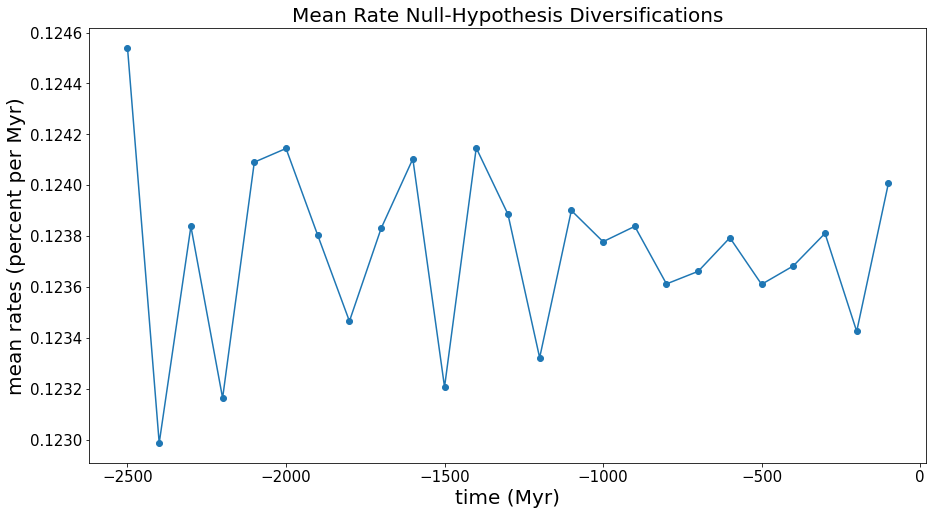

In [5]:
plt.subplots(1, 1, figsize=(15, 8))
plt.plot(np.arange(-2500, 0, 100), SAR202_null_mean[0:25], '-o')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('mean rates (percent per Myr)', size = '20')
plt.title('Mean Rate Null-Hypothesis Diversifications',  size = '20')

### Test the difference between simulated time series N(t) and deterministic series exp(a*t) is white noise

In [6]:
# Compute the log of the null-hypothesis rates. 
simulated_data = np.array((SAR202_nodes_density_each_interval_dataframe / 3840)[0:27])
# Compute the mean diversification rates at each time point.  
mean_null_hypothesis_rates = pd.DataFrame(simulated_data).mean()
simulated_model_N = np.cumsum(mean_null_hypothesis_rates)[0:27] # N is the cumulative number of nodes at each time point 
log_simulated_model_N = np.log(simulated_model_N)
np.array(mean_null_hypothesis_rates)

array([1.        , 0.13137539, 0.14858218, 0.1711034 , 0.1905189 ,
       0.21633873, 0.24334491, 0.27881944, 0.31304977, 0.35230517,
       0.40256559, 0.45469715, 0.51655093, 0.58025656, 0.66179591,
       0.74615162, 0.83939043, 0.95457176, 1.07887731, 1.21765046,
       1.38596644, 1.57164352, 1.77339892, 2.01274113, 2.2735436 ,
       2.56742863, 2.91518133])

In [7]:
# Compute the log of the theoretical (i.e., exponential-growth) rates. 
deterministic_rate = [np.exp(0.1237*time_step) for time_step in range(0, 27)]
theoretical_model_N = np.array(deterministic_rate)[0:27]
log_theoretical_model_N = np.log(theoretical_model_N)
theoretical_node_number_in_one_bin = [theoretical_model_N[i+1] - theoretical_model_N[i] for i in range(0,26)]
np.array(theoretical_node_number_in_one_bin)

array([0.13167632, 0.14901497, 0.16863671, 0.19084217, 0.21597157,
       0.24440991, 0.27659291, 0.31301364, 0.35423012, 0.40087384,
       0.45365943, 0.51339564, 0.58099768, 0.65750132, 0.74407867,
       0.84205621, 0.95293507, 1.07841405, 1.22041564, 1.38111548,
       1.56297568, 1.76878256, 2.00168933, 2.26526441, 2.56354609,
       2.90110439])

In [8]:
simulated_data = np.array((SAR202_nodes_density_each_interval_dataframe.iloc[700] / 3840)[0:27])
null_hypothesis_rates = pd.DataFrame(simulated_data)
difference = np.log(np.array(null_hypothesis_rates[1:27][0].tolist())) - np.log(np.array(theoretical_node_number_in_one_bin))
difference

array([ 7.31301117e-02, -5.24098152e-02, -1.64494796e-02, -1.35099130e-02,
       -1.74310219e-02,  1.56074013e-03, -9.57074184e-03, -3.03847682e-02,
        1.94792852e-02, -8.05882992e-03, -1.21583389e-02,  7.86210742e-03,
        8.46636006e-03, -3.18911474e-04, -2.19404622e-03,  6.32115264e-03,
       -1.27254040e-02, -1.23471895e-03, -1.70869702e-02,  9.73967304e-05,
        6.67122681e-03, -1.88939025e-02, -3.32133262e-03,  1.74795660e-02,
       -3.06524236e-04, -3.16839881e-03])

Text(0.5, 1.0, 'log(node number)_{simulation} - R * t')

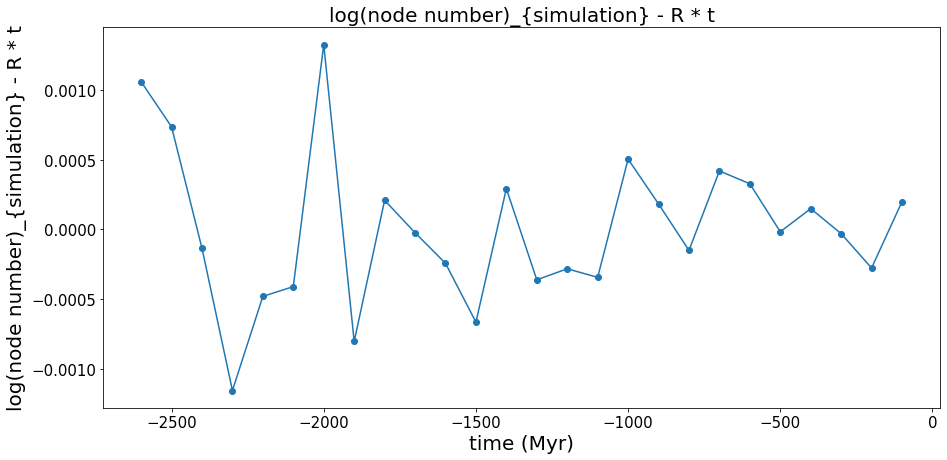

In [9]:
plt.subplots(1, 1, figsize=(15, 7))
m = 26 # The number of samples in the window.
n = 26 # Window length.
d = 100 # Sampling Period = 100 Myr

df = pd.DataFrame()
for i in range(0, 1000):
    simulated_data = np.array((SAR202_nodes_density_each_interval_dataframe.iloc[i] / 3840)[0:27])
    null_hypothesis_rates = pd.DataFrame(simulated_data)
    difference = np.log(np.array(null_hypothesis_rates[1:27][0].tolist())) - np.log(np.array(theoretical_node_number_in_one_bin))
    df[i] = signal.detrend(difference)
    
plt.plot(np.arange(-2600, 0, 100), df.mean(axis=1)[0:27], '-o')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('log(node number)_{simulation} - R * t', size = '20')
plt.title('log(node number)_{simulation} - R * t',  size = '20')

Text(0.5, 1.0, 'Power Spectrum of "log(node number)_{simulation} - R * t"')

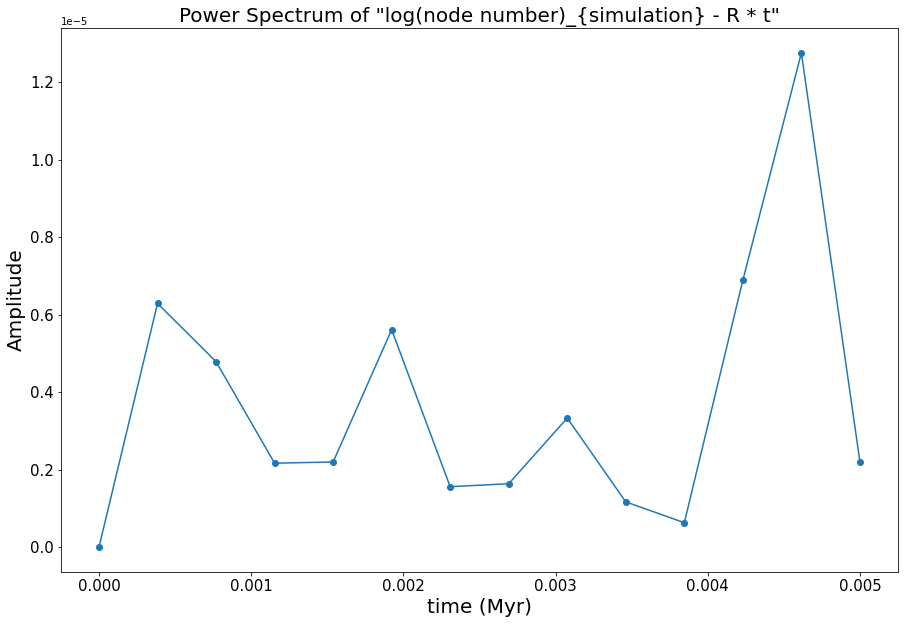

In [10]:
m = 26 # The number of samples in the window.
n = 26 # Window length.
d = 100 # Sampling Period = 100 Myr

maximum_peak_in_each_spectrum = []
df = pd.DataFrame()
for i in range(0, 1):
    simulated_data = np.array((SAR202_nodes_density_each_interval_dataframe.iloc[i] / 3840)[0:27])
    null_hypothesis_rates = pd.DataFrame(simulated_data)
    difference = np.log(np.array(null_hypothesis_rates[1:27][0].tolist())) - np.log(np.array(theoretical_node_number_in_one_bin))
    detrended_noise = signal.detrend(difference)
    applied_window_noise = detrended_noise * get_window('hamming', m)
    meanremoved_applied_window_noise = signal.detrend(applied_window_noise)
    w = np.fft.rfft(meanremoved_applied_window_noise, n)/m
    freqs = np.fft.rfftfreq(n, d)
    df[i] = np.abs(w)**2
    
plt.subplots(1, 1, figsize=(15, 10))
plt.plot(freqs, df.mean(axis=1)[0:27], '-o')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('Amplitude', size = '20')
plt.title('Power Spectrum of "log(node number)_{simulation} - R * t"',  size = '20')

In [11]:
np.histogram(maximum_peak_in_each_spectrum)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [12]:
real_SAR202_node_nuymber_in_each_bin = np.array([6.25000000e-03, 2.00520833e-02, 4.58333333e-02, 8.48958333e-02, 
                                                 1.50260417e-01, 2.32812500e-01, 2.82291667e-01, 3.66927083e-01, 
                                                 4.67708333e-01, 5.33854167e-01, 5.32812500e-01, 3.09114583e-01, 
                                                 1.96354167e-01, 3.13541667e-01, 8.82031250e-01, 1.67395833e+00, 
                                                 2.40651042e+00, 2.57500000e+00, 3.27656250e+00, 2.02083333e+00, 
                                                 2.40625000e+00, 1.83750000e+00, 2.17526042e+00, 3.27630208e+00, 
                                                 5.62838542e+00, 3.29661458e+00])

Text(0.5, 1.0, 'log(node number)_{real} - R * t')

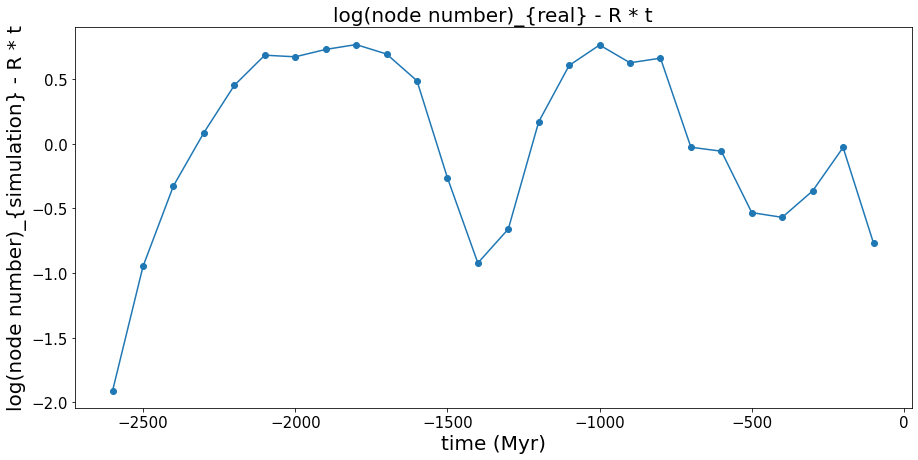

In [13]:
plt.subplots(1, 1, figsize=(15, 7))
df = pd.DataFrame()
difference = np.log(real_SAR202_node_nuymber_in_each_bin) - np.log(np.array(theoretical_node_number_in_one_bin))
df[i] = signal.detrend(difference)
    
plt.plot(np.arange(-2600, 0, 100), df.mean(axis=1)[0:26], '-o')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('log(node number)_{simulation} - R * t', size = '20')
plt.title('log(node number)_{real} - R * t',  size = '20')

Text(0.5, 1.0, 'Power Spectrum of "log(node number)_{real} - R * t"')

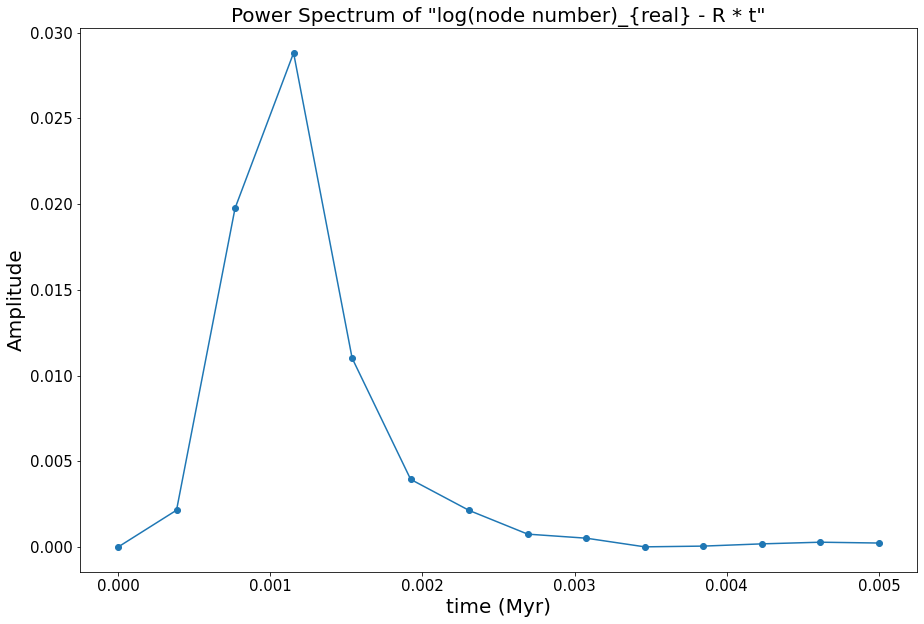

In [14]:
m = 26 # The number of samples in the window.
n = 26 # Window length.
d = 100 # Sampling Period = 100 Myr

df = pd.DataFrame()
for i in range(0, 1000):
    difference = np.log(real_SAR202_node_nuymber_in_each_bin) - np.log(np.array(theoretical_node_number_in_one_bin))
    detrended_noise = signal.detrend(difference)
    applied_window_noise = detrended_noise * get_window('hamming', m)
    meanremoved_applied_window_noise = signal.detrend(applied_window_noise)
    w = np.fft.rfft(meanremoved_applied_window_noise, n)/m
    freqs = np.fft.rfftfreq(n, d)
    df[i] = np.abs(w)**2
    
plt.subplots(1, 1, figsize=(15, 10))
plt.plot(freqs, df.mean(axis=1)[0:27], '-o')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('Amplitude', size = '20')
plt.title('Power Spectrum of "log(node number)_{real} - R * t"',  size = '20')

In [15]:
difference

array([-3.0477653 , -2.00571371, -1.30273514, -0.81002175, -0.36277687,
       -0.04861336,  0.02039405,  0.15891638,  0.27789811,  0.28647594,
        0.16082281, -0.50733474, -1.08482677, -0.74051451,  0.17008072,
        0.68709959,  0.92638625,  0.87035804,  0.98760336,  0.38061848,
        0.43147803,  0.03811446,  0.0831569 ,  0.36902388,  0.78643113,
        0.12780457])

In [16]:
def integrate(x,y):
    value = np.trapz(y,x)
    return value

In [17]:
simulated_data[0]

1.0

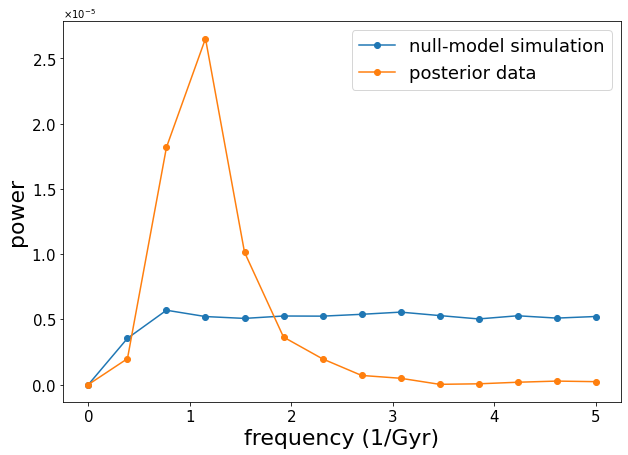

In [18]:
from matplotlib import ticker

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
m = 26 # The number of samples in the window.
n = 26 # Window length.
d = 100 # Sampling Period = 100 Myr
df_1 = pd.DataFrame()
for i in range(0, 1000):
    simulated_data = np.array((SAR202_nodes_density_each_interval_dataframe.iloc[i] / 3840)[0:27])
    null_hypothesis_rates = pd.DataFrame(simulated_data)
    difference = np.log(np.array(null_hypothesis_rates[1:27][0].tolist())) - np.log(np.array(theoretical_node_number_in_one_bin))
    detrended_noise = signal.detrend(difference)
    applied_window_noise = detrended_noise * get_window('hamming', m)
    meanremoved_applied_window_noise = signal.detrend(applied_window_noise)
    w = np.fft.rfft(meanremoved_applied_window_noise, n)/m
    freqs = np.fft.rfftfreq(n, d)
    df_1[i] = np.abs(w)**2
plt.plot(freqs, df_1.mean(axis=1)[0:27], '-o', label='null-model simulation')   


m = 26 # The number of samples in the window.
n = 26 # Window length.
d = 100 # Sampling Period = 100 Myr
difference = np.log(real_SAR202_node_nuymber_in_each_bin) - np.log(np.array(theoretical_node_number_in_one_bin))
detrended_noise = signal.detrend(difference)
applied_window_noise = detrended_noise * get_window('hamming', m)
meanremoved_applied_window_noise = signal.detrend(applied_window_noise)
w = np.fft.rfft(meanremoved_applied_window_noise, n)/m
freqs = np.fft.rfftfreq(n, d)
df_2 = np.abs(w)**2
rescaled_df_2 = df_2 * integrate(freqs, df_1.mean(axis=1)) / integrate(freqs, df_2)
plt.plot(freqs, rescaled_df_2[0:27], '-o', label='posterior data')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('frequency (1/Gyr)', size = '22')
plt.ylabel('power', size = '22')

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 
plt.xticks(ticks=np.arange(0, 0.006, step=0.001),  labels=np.arange(0, 6, step=1))
plt.legend(fontsize=18)

### Test the white noise using Ljung-Box Test

In [19]:
import statsmodels.api as sm
real_difference_of_log = difference = np.log(real_SAR202_node_nuymber_in_each_bin) - np.log(np.array(theoretical_node_number_in_one_bin))
real_p_values = sm.stats.acorr_ljungbox(real_difference_of_log, lags=25)[1]
real_p_values

C:\Program Files\Anaconda\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


array([2.58640248e-04, 1.44605583e-04, 3.75346150e-04, 1.06169956e-03,
       2.41751430e-03, 5.01361451e-03, 9.66270652e-03, 1.72729475e-02,
       2.68335518e-02, 3.48679786e-02, 3.86604951e-02, 4.87145614e-02,
       6.97199378e-02, 5.75780097e-02, 2.42526274e-02, 6.83856335e-03,
       2.08417672e-03, 8.35343128e-04, 7.66948160e-04, 6.86642189e-04,
       7.15131060e-04, 4.56809996e-04, 1.08273486e-04, 1.54101256e-05,
       1.99357492e-05])

In [20]:
null_average_node_number_in_each_bin = pd.DataFrame()
for i in range(0, 1000):
    simulated_data = np.array((SAR202_nodes_density_each_interval_dataframe.iloc[i] / 3840)[0:27])
    null_average_node_number_in_each_bin[i] = simulated_data
null_average = np.array(null_average_node_number_in_each_bin.mean(axis=1))

null_difference_of_log = np.log(null_average[1:27]) - np.log(np.array(theoretical_node_number_in_one_bin))
null_p_values = sm.stats.acorr_ljungbox(null_difference_of_log, lags=25)[1]
null_p_values

array([0.85028165, 0.96172254, 0.48999301, 0.6148727 , 0.69805762,
       0.60169551, 0.67340194, 0.74719977, 0.70249093, 0.7833205 ,
       0.84625595, 0.86532504, 0.86689183, 0.87893137, 0.90395657,
       0.93300069, 0.95341601, 0.96247254, 0.93883462, 0.95360251,
       0.96604278, 0.97697188, 0.98453473, 0.98969666, 0.98152343])

In [21]:
lags = np.arange(1, 26)

In [23]:
null_p_values

array([0.85028165, 0.96172254, 0.48999301, 0.6148727 , 0.69805762,
       0.60169551, 0.67340194, 0.74719977, 0.70249093, 0.7833205 ,
       0.84625595, 0.86532504, 0.86689183, 0.87893137, 0.90395657,
       0.93300069, 0.95341601, 0.96247254, 0.93883462, 0.95360251,
       0.96604278, 0.97697188, 0.98453473, 0.98969666, 0.98152343])

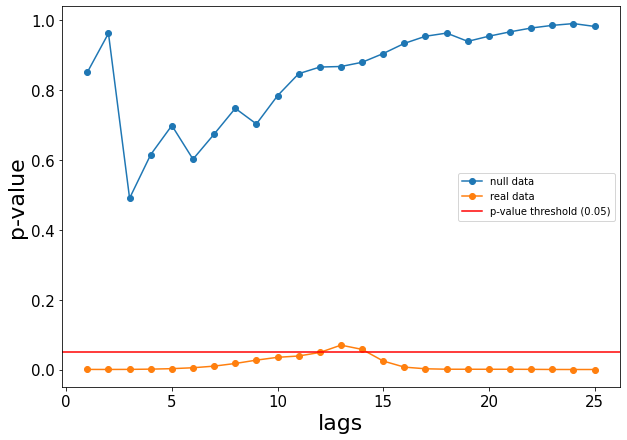

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.plot(lags, null_p_values, '-o', label='null data')
plt.plot(lags, real_p_values, '-o', label='real data')

plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('lags', size = '22')
plt.ylabel('p-value', size = '22')
plt.axhline(y=0.05, color='r', linestyle='-',  label='p-value threshold (0.05)')
plt.legend()

### Test the statistical significance of the highest peak in the real-data spectrum compared to the highest peaks in the null-hypothesis spectra

In [25]:
m = 26 # The number of samples in the window.
n = 26 # Window length.
d = 100 # Sampling Period = 100 Myr
df_1 = pd.DataFrame()
df_1_list = []
forth_elemnt_Ineach_spectrum = []
max_peak_null_hypothesis_list = []
for i in range(0, 10000):
    simulated_data = np.array((SAR202_nodes_density_each_interval_dataframe.iloc[i] / 3840)[0:27])
    null_hypothesis_rates = pd.DataFrame(simulated_data)
    difference = np.log(np.array(null_hypothesis_rates[1:27][0].tolist())) - np.log(np.array(theoretical_node_number_in_one_bin))
    detrended_noise = signal.detrend(difference)
    applied_window_noise = detrended_noise * get_window('hamming', m)
    meanremoved_applied_window_noise = signal.detrend(applied_window_noise)
    w = np.fft.rfft(meanremoved_applied_window_noise, n)/m
    freqs = np.fft.rfftfreq(n, d)
    df_1[i] = np.abs(w)**2
    df_1_list.extend((np.abs(w)**2).tolist())
    max_peak_null_hypothesis_list.append(np.max(np.abs(w)**2))
    forth_elemnt_Ineach_spectrum.append((np.abs(w)**2)[3])

m = 26 # The number of samples in the window.
n = 26 # Window length.
d = 100 # Sampling Period = 100 Myr
difference = np.log(real_SAR202_node_nuymber_in_each_bin) - np.log(np.array(theoretical_node_number_in_one_bin))
detrended_noise = signal.detrend(difference)
applied_window_noise = detrended_noise * get_window('hamming', m)
meanremoved_applied_window_noise = signal.detrend(applied_window_noise)
w = np.fft.rfft(meanremoved_applied_window_noise, n)/m
freqs = np.fft.rfftfreq(n, d)
df_2 = np.abs(w)**2
rescaled_df_2 = df_2 * integrate(freqs,df_1.mean(axis=1)) / integrate(freqs, df_2)
rescaled_df_2

array([7.14572485e-37, 1.99624952e-06, 1.83351813e-05, 2.67376695e-05,
       1.02237422e-05, 3.66436931e-06, 1.98225421e-06, 7.00751156e-07,
       4.81673740e-07, 1.34175839e-08, 5.33363950e-08, 1.74520325e-07,
       2.64138138e-07, 2.19487231e-07])

In [26]:
ninty_percentile_for_each_frequency = []
for i in range(0, 14):
    ninty_percentile_for_each_frequency.append(np.percentile(df_1.iloc[i], 90))

nintyfive_percentile_for_each_frequency = []
for i in range(0, 14):
    nintyfive_percentile_for_each_frequency.append(np.percentile(df_1.iloc[i], 95))

nintynine_percentile_for_each_frequency = []
for i in range(0, 14):
    nintynine_percentile_for_each_frequency.append(np.percentile(df_1.iloc[i], 99))

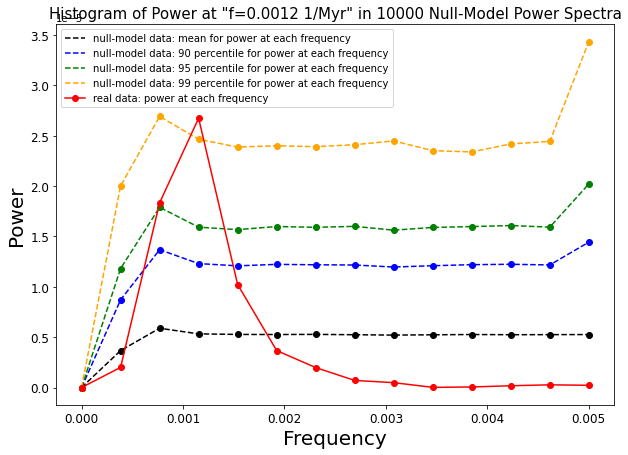

In [27]:
plt.subplots(1, 1, figsize=(10, 7))

plt.plot(freqs, np.array(df_1.mean(axis=1)), '--', label='null-model data: mean for power at each frequency', color="black")
plt.plot(freqs, np.array(df_1.mean(axis=1)), 'o', color="black")

plt.plot(freqs, np.array(ninty_percentile_for_each_frequency), '--', label='null-model data: 90 percentile for power at each frequency', color="blue")
plt.plot(freqs, np.array(ninty_percentile_for_each_frequency), 'o', color="blue")

plt.plot(freqs, np.array(nintyfive_percentile_for_each_frequency), '--', label='null-model data: 95 percentile for power at each frequency', color="green")
plt.plot(freqs, np.array(nintyfive_percentile_for_each_frequency), 'o', color="green")

plt.plot(freqs, np.array(nintynine_percentile_for_each_frequency), '--', label='null-model data: 99 percentile for power at each frequency', color="orange")
plt.plot(freqs, np.array(nintynine_percentile_for_each_frequency), 'o', color="orange")

plt.plot(freqs, rescaled_df_2, '-o', label='real data: power at each frequency', color="red")
plt.xlabel('Frequency',  size = '20')
plt.ylabel('Power', size = '20')
plt.title('Histogram of Power at "f=0.0012 1/Myr" in 10000 Null-Model Power Spectra',  size = '15')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.show()

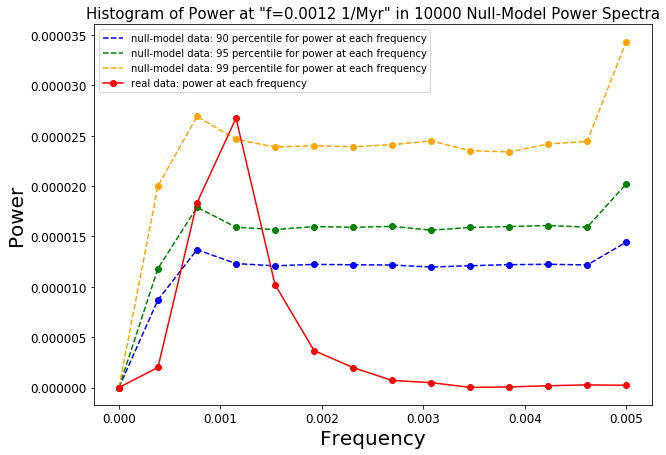

In [28]:
plt.subplots(1, 1, figsize=(10, 7))

plt.plot(freqs, np.array(df_1.mean(axis=1)), '--', label='null-model data: 90 percentile for power at each frequency', color="blue")
plt.plot(freqs, np.array(df_1.mean(axis=1)), 'o', color="blue")

plt.plot(freqs, np.array(ninty_percentile_for_each_frequency), '--', label='null-model data: 90 percentile for power at each frequency', color="blue")
plt.plot(freqs, np.array(ninty_percentile_for_each_frequency), 'o', color="blue")

plt.plot(freqs, np.array(nintyfive_percentile_for_each_frequency), '--', label='null-model data: 95 percentile for power at each frequency', color="green")
plt.plot(freqs, np.array(nintyfive_percentile_for_each_frequency), 'o', color="green")

plt.plot(freqs, np.array(nintynine_percentile_for_each_frequency), '--', label='null-model data: 99 percentile for power at each frequency', color="orange")
plt.plot(freqs, np.array(nintynine_percentile_for_each_frequency), 'o', color="orange")

plt.plot(freqs, rescaled_df_2, '-o', label='real data: power at each frequency', color="red")
plt.xlabel('Frequency',  size = '20')
plt.ylabel('Power', size = '20')
plt.title('Histogram of Power at "f=0.0012 1/Myr" in 10000 Null-Model Power Spectra',  size = '15')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.show()

array([5.76924281e-36, 1.18141055e-05, 1.78918349e-05, 1.59183398e-05,
       1.56753514e-05, 1.59834388e-05, 1.59065628e-05, 1.59988381e-05,
       1.56222592e-05, 1.58909771e-05, 1.59778879e-05, 1.60818763e-05,
       1.59206226e-05, 2.02092528e-05])

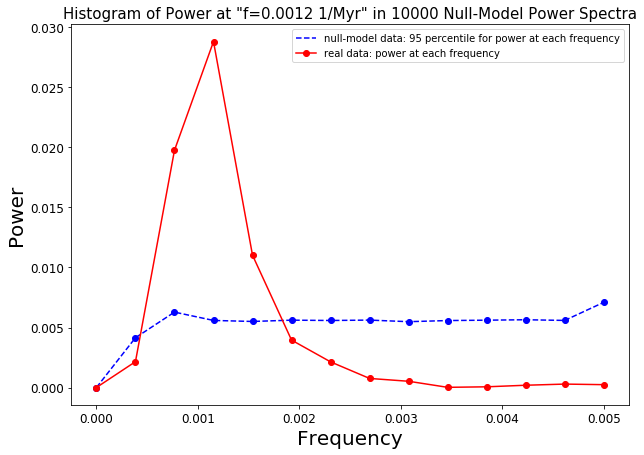

In [47]:
plt.subplots(1, 1, figsize=(10, 7))
percentile_for_each_frequency = []
for i in range(0, 14):
    percentile_for_each_frequency.append(np.percentile(df_1.iloc[i], 95))
np.array(percentile_for_each_frequency)
rescaled_percentile_for_each_frequency = np.array(percentile_for_each_frequency) * integrate(freqs, df_2) / integrate(freqs,np.array(percentile_for_each_frequency))
plt.plot(freqs, np.array(rescaled_percentile_for_each_frequency), '--', label='null-model data: 95 percentile for power at each frequency', color="blue")
plt.plot(freqs, np.array(rescaled_percentile_for_each_frequency), 'o', color="blue")
plt.plot(freqs, df_2, '-o', label='real data: power at each frequency', color="red")
plt.xlabel('Frequency',  size = '20')
plt.ylabel('Power', size = '20')
plt.title('Histogram of Power at "f=0.0012 1/Myr" in 10000 Null-Model Power Spectra',  size = '15')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.show()

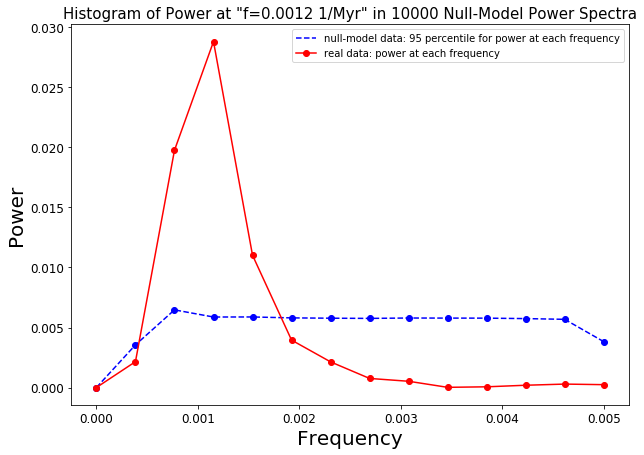

In [50]:
plt.subplots(1, 1, figsize=(10, 7))
percentile_for_each_frequency = []
for i in range(0, 14):
    percentile_for_each_frequency.append(np.percentile(df_1.iloc[i], 50))
np.array(percentile_for_each_frequency)
rescaled_percentile_for_each_frequency = np.array(percentile_for_each_frequency) * integrate(freqs, df_2) / integrate(freqs,np.array(percentile_for_each_frequency))
plt.plot(freqs, np.array(rescaled_percentile_for_each_frequency), '--', label='null-model data: 95 percentile for power at each frequency', color="blue")
plt.plot(freqs, np.array(rescaled_percentile_for_each_frequency), 'o', color="blue")
plt.plot(freqs, df_2, '-o', label='real data: power at each frequency', color="red")
plt.xlabel('Frequency',  size = '20')
plt.ylabel('Power', size = '20')
plt.title('Histogram of Power at "f=0.0012 1/Myr" in 10000 Null-Model Power Spectra',  size = '15')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.show()

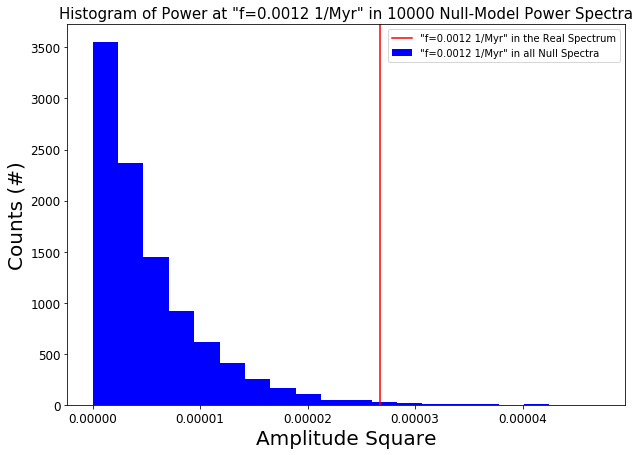

In [43]:
plt.subplots(1, 1, figsize=(10, 7))
plt.hist(forth_elemnt_Ineach_spectrum, bins=20, label='"f=0.0012 1/Myr" in all Null Spectra', color="blue")
plt.axvline(x=np.max(rescaled_df_2), label='"f=0.0012 1/Myr" in the Real Spectrum', color="red")
plt.xlabel('Amplitude Square',  size = '20')
plt.ylabel('Counts (#)', size = '20')
plt.title('Histogram of Power at "f=0.0012 1/Myr" in 10000 Null-Model Power Spectra',  size = '15')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.show()

In [37]:
len([element for element in forth_elemnt_Ineach_spectrum if element >= np.max(rescaled_df_2)])/10000

0.0064

In [45]:
np.array([np.percentile(max_peak_null_hypothesis_list, 2.5), np.percentile(max_peak_null_hypothesis_list, 97.5)])

array([5.73066507e-06, 3.40887176e-05])

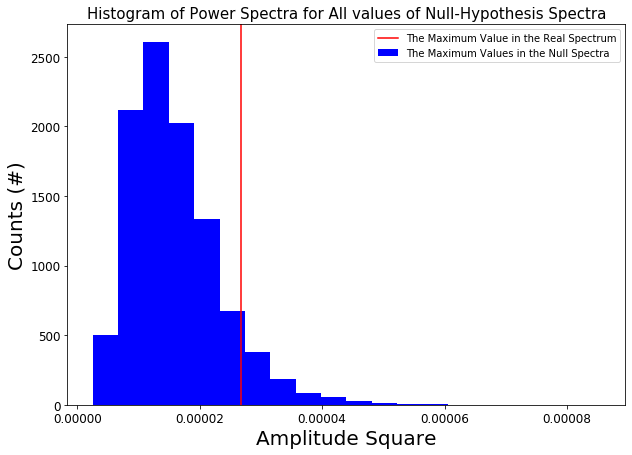

In [79]:
plt.subplots(1, 1, figsize=(10, 7))
plt.hist(max_peak_null_hypothesis_list, bins=20, label='The Maximum Values in the Null Spectra', color="blue")
plt.axvline(x=np.max(rescaled_df_2), label='The Maximum Value in the Real Spectrum', color="red")
plt.xlabel('Amplitude Square',  size = '20')
plt.ylabel('Counts (#)', size = '20')
plt.title('Histogram of Power Spectra for All values of Null-Hypothesis Spectra',  size = '15')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.show()

In [47]:
[np.percentile(df_1, 2.5), np.percentile(df_1, 97.5)]

[2.8490087934722427e-37, 1.958090737031812e-05]

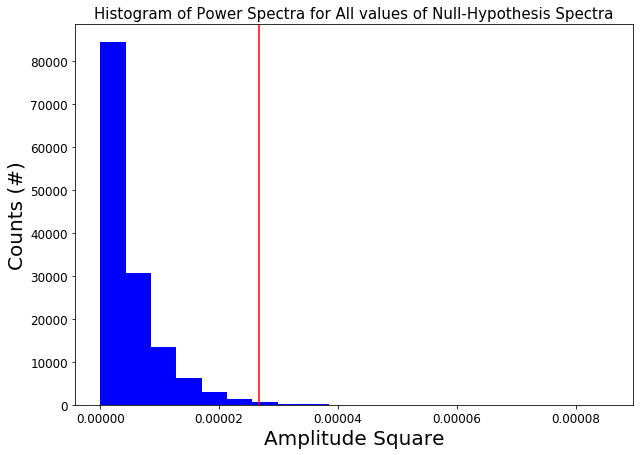

In [80]:
plt.subplots(1, 1, figsize=(10, 7))
plt.hist(df_1_list, bins=20, label='All Values in the Null Spectra', color="blue")
plt.axvline(x=np.max(rescaled_df_2), label='The Maximum Value in the Real Spectrum', color="red")
plt.xlabel('Amplitude Square',  size = '20')
plt.ylabel('Counts (#)', size = '20')
plt.title('Histogram of Power Spectra for All values of Null-Hypothesis Spectra',  size = '15')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [15]:
STD = np.array([0.04112094, 0.0531347 , 0.04978363, 0.0476853 , 0.04437546,
       0.04166192, 0.03923515, 0.03694197, 0.03432866, 0.03240464,
       0.03089616, 0.0290514 , 0.02702161, 0.02547338, 0.02372452,
       0.02226285, 0.02117603, 0.01989259, 0.01890259, 0.0175681 ,
       0.01645747, 0.01539844, 0.01447572, 0.01376077, 0.01292482,
       0.01216053])
np.exp(np.flip(STD))

array([1.01223477, 1.01300871, 1.01385589, 1.014581  , 1.01551761,
       1.01659364, 1.01772333, 1.01908237, 1.02009177, 1.02140183,
       1.02251252, 1.02400819, 1.0258006 , 1.02739   , 1.02947751,
       1.0313784 , 1.03293539, 1.03492469, 1.03763281, 1.04001501,
       1.04254196, 1.04537478, 1.04884053, 1.05104366, 1.05457169,
       1.04197811])

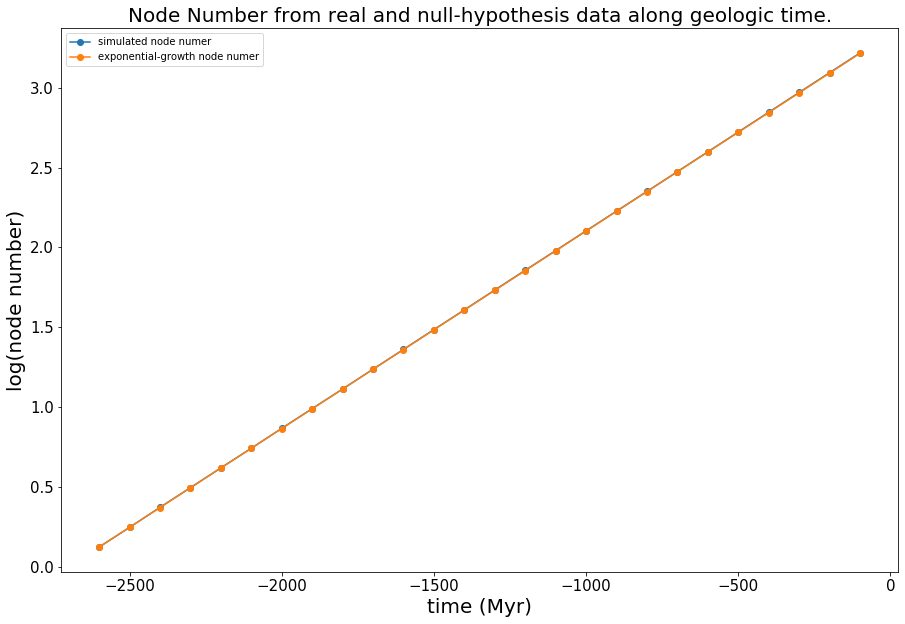

In [16]:
plt.subplots(1, 1, figsize=(15, 10))
plt.plot(np.arange(-2600, 0, 100), log_simulated_model_N[1:27], '-o', label="simulated node numer")
plt.plot(np.arange(-2600, 0, 100), log_theoretical_model_N[1:27], '-o', label="exponential-growth node numer")
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('log(node number)', size = '20')
plt.title('Node Number from real and null-hypothesis data along geologic time.',  size = '20')
plt.legend()

### Plot a series of log(node numer)

In [17]:
simulated_data[1:27]

array([0.13229167, 0.14713542, 0.17864583, 0.19635417, 0.2046875 ,
       0.26067708, 0.26848958, 0.32682292, 0.35052083, 0.41171875,
       0.471875  , 0.52005208, 0.58958333, 0.65390625, 0.75755208,
       0.85963542, 0.9640625 , 1.0875    , 1.24166667, 1.39505208,
       1.59036458, 1.77708333, 2.00416667, 2.32239583, 2.6109375 ,
       2.91927083])

In [ ]:
fig, (a) = plt.subplots(3, 1, figsize=(17, 12))

for i in range(0,3):
    ax1 = a[i]
    difference = signal.detrend(np.log(simulated_data[i])[1:27])
    detrended_noise = signal.detrend(difference)
    ax1.plot(np.arange(-2600, 0, 100), detrended_noise, '-o', color="green")
    ax1.set_xlim(-2700, 50)
    ax1.set_xlabel('time (Myr)',  size = '20')
    ax1.set_ylabel('detrended node', size = '20')
    ax1.tick_params(axis='both', which='major', labelsize=15)### Test the difference between simulated time series N(t) and deterministic series exp(a*t) is white noise

### Plot a series of log(difference node numer)

### Power Spectrum of the log(Null-Hypothesis Node Number)

In [ ]:

plt.subplots(1, 1, figsize=(15, 10))
plt.plot(np.arange(-2500, 0, 100), meanremoved_noise[1:26], '-o')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('detrended', size = '20')
#plt.title('cumulative node number from simulation',  size = '20')
plt.legend()

In [ ]:
# Power Spectrum in Linear Scale

plt.subplots(1, 1, figsize=(15, 7))
m = 26 # The number of samples in the window.
n = 26 # Window length.
d = 100 # Sampling Period = 100 Myr

for window in ['hamming']:   
    difference = signal.detrend(log_simulated_model_N[1:27])
    detrended_noise = signal.detrend(difference)
    meanremoved_noise = detrended_noise - np.mean(detrended_noise)
    applied_window_noise =meanremoved_noise* get_window(window, m)
    meanremoved_applied_window_noise = applied_window_noise - np.mean(applied_window_noise)
    w = np.fft.rfft(meanremoved_applied_window_noise, n)/m
    freqs = np.fft.rfftfreq(n, d)
    plt.plot(freqs[0:26], 300*(np.abs(w)**2)[0:26], '-o', color="green",  label="noise")
        
plt.xlim(-0.0001, 0.0051)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('frequency (1 / Myr)',  size = '20')
plt.ylabel('Amplitude', size = '20')
plt.title('Power Spectrum of Null-Hypothesis Node Number -- Linear Scale',  size = '20')
plt.legend()

In [ ]:
# Power Spectrum in Log Scale

plt.subplots(1, 1, figsize=(15, 7))
plt.plot(np.log10(freqs[1:26]), np.log10(SAR202.mean(axis=1)[1:26]), '-o')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('log(frequency)',  size = '20')
plt.ylabel('log(Amplitude)', size = '20')
plt.title('Power Spectrum of Null-Hypothesis Node Number -- Log Scale',  size = '20')

In [ ]:
plt.subplots(1, 1, figsize=(15, 10))
plt.plot(np.arange(-2500, 0, 100), theoretical_model_N[1:26], '-o')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('cumulative N', size = '20')
plt.title('cumulative node number from simulation',  size = '20')
plt.legend()

In [ ]:
a = theoretical_model_N[1:27]
node_difference = [a[i+1] - a[i] for i in range(0,25)]   
plt.subplots(1, 1, figsize=(15, 10))
plt.plot(np.arange(-2500, 0, 100), node_difference, '-o')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('non-cumulative N', size = '20')
plt.title('non-cumulative node number difference from simulation',  size = '20')
plt.legend()

In [ ]:
a = theoretical_model_N[1:27]
node_difference = [a[i+1] - a[i] for i in range(0,25)]
node_difference_difference =  [node_difference[i+1] - node_difference[i] for i in range(0,24)]  
plt.subplots(1, 1, figsize=(15, 10))
plt.plot(np.arange(-2400, 0, 100), node_difference_difference, '-o')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('dN', size = '20')
plt.title('non-cumulative node number difference from simulation',  size = '20')
plt.legend()

In [ ]:
plt.subplots(1, 1, figsize=(15, 10))
m = 25 # The number of samples in the window.
n = 50 # Window length.
d = 100 # Sampling Period = 100 Myr

simulated_SAR202_nodes_density = np.array(SAR202_nodes_density_each_interval_dataframe)

df = pd.DataFrame()
#for window in ['triang', 'hamming', 'hann', 'blackman','bartlett', 'blackmanharris']:  
for window in ['hamming']:
    for simulation_index in range (0, 10):
        a = simulated_data[simulation_index][1:27]
        node_difference = [a[i+1] - a[i] for i in range(0,25)]
        detrended_noise = signal.detrend(node_difference)
        applied_window_noise = detrended_noise * get_window(window, m)
        meanremoved_applied_window_noise = applied_window_noise - np.mean(applied_window_noise)
        w = np.fft.rfft(meanremoved_applied_window_noise, n)/m
        freqs = np.fft.rfftfreq(n, d)
        df[simulation_index] = (np.abs(w)**2)
        plt.plot(freqs[0:26], (np.abs(w)**2)[0:26], '-o')
        
plt.xlim(-0.0001, 0.0051)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('frequency (1 / Myr)',  size = '20')
plt.ylabel('Amplitude', size = '20')
plt.title('100 Power Spectra for Null-Hypothesis Model Noise',  size = '20')

In [ ]:
plt.subplots(1, 1, figsize=(15, 10))
m = 25 # The number of samples in the window.
n = 50 # Window length.
d = 100 # Sampling Period = 100 Myr

simulated_SAR202_nodes_density = np.array(SAR202_nodes_density_each_interval_dataframe)

df = pd.DataFrame()
#for window in ['triang', 'hamming', 'hann', 'blackman','bartlett', 'blackmanharris']:  
for window in ['hamming']:
    for simulation_index in range (0, 100):
        simulated_model_N = np.cumsum(simulated_SAR202_nodes_density[simulation_index])
        model_noise = signal.detrend(np.log(simulated_model_N[1:26]))
        detrended_noise = signal.detrend(model_noise)
        meanremoved_noise = detrended_noise - np.mean(detrended_noise)
        applied_window_noise =meanremoved_noise* get_window(window, m)
        meanremoved_applied_window_noise = applied_window_noise - np.mean(applied_window_noise)
        w = np.fft.rfft(meanremoved_applied_window_noise, n)/m
        freqs = np.fft.rfftfreq(n, d)
        df[simulation_index] = (np.abs(w)**2)
        plt.plot(freqs[0:26], (np.abs(w)**2)[0:26], '-o')
        
plt.xlim(-0.0001, 0.0051)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('frequency (1 / Myr)',  size = '20')
plt.ylabel('Amplitude', size = '20')
plt.title('100 Power Spectra for Null-Hypothesis Model Noise',  size = '20')

### Read the real data

In [ ]:
real_SAR202 = np.array([
    1.2705448584676137, 0.8953225829141632, 0.6317782341836535, 0.7838437420307568,
    0.553818670251097, 0.33552256893350574, 0.2853039500468135, 0.22955154760953977,
    0.22243357613351747, 0.18374100344818078, 0.04992556026074891, -0.5446928989330733, 
    -0.48711579168693575, 0.5811007968809951, 0.9530483156093394, 0.6703325027937739, 
    0.35390187175649634, 0.057698224919183534, 0.25053260727808313, -0.5004063961899252, 
    0.19422529770561292, -0.2782785671512329, 0.18054061242296005, 0.4124519326697622, 
    0.525352589635713])

## Perform Analyses

### 1. For the real data 
#### (1) Compute the mean ages over the 4000 trees generated by Phylobayes -- this gives one time series;
#### (2) Rescale the time series in step (1) so as N = 1;
#### (3) Detrend this rescaled time series;
#### (4) Subtract the mean from the detrended time series  -- this step is actually not necessary, becase "detrend" already substracts the means;
#### (5) Multipy the time series by Hamming windows to obatin a windoed time series;
#### (6) Substract the mean from the "windoed time series";
#### (7) Compute the power spectrum mean-removed "windoed time series".

### 2, For the null-hypothesis data
#### (1) Generate 4000 fake trees and compute the mean ages over these 4000 trees -- this gives one time series;
#### (2) Rescale the time series in step (1) so as N = 1;
#### (3) Detrend this rescaled time series;
#### (4) Subtract the mean from the detrended time series -- this step is actually not necessary, becase "detrend" already substracts the means;
#### (5) Multipy the time series by Hamming windows to obatin a windoed time series;
#### (6) Substract the mean from the "windoed time series";
#### (7) Compute the power spectrum mean-removed "windoed time series" -- this gives us one power spectrum;
#### (8) Repeat steps (1)-(7) to generate M = 1000 (or even more) power spectra; 
#### (9) Compute the average power spectrum from those M=1000 power spectra obtained in step (8) using the Hamming windows.

In [ ]:
plt.subplots(1, 1, figsize=(15, 10))
m = 25 # The number of samples in the window.
n = 50 # Window length.
d = 100 # Sampling Period = 100 Myr

#for window in ['triang', 'hamming', 'hann', 'blackman','bartlett', 'blackmanharris']:  
for window in ['hamming']:      
    rescaled_SAR202 = (real_SAR202[0:25] - np.mean(real_SAR202[0:25]))
    detrended_SAR202 = signal.detrend(rescaled_SAR202)
    meanremoved_SAR202 = detrended_SAR202 - np.mean(detrended_SAR202)
    applied_window_SAR202 = meanremoved_SAR202* get_window(window, m)
    meanremoved_applied_window_SAR202 = applied_window_SAR202 - np.mean(applied_window_SAR202)
    w = np.fft.rfft(meanremoved_applied_window_SAR202, n)/m
    freqs = np.fft.rfftfreq(n, d)
    plt.plot(freqs, np.abs(w)**2, '-o', label="mean of real data")

    
l=26 # the value of "l" is the length of "w"
df = pd.DataFrame(columns=[0]*l)    
for i in range(0,1000):    
    rescaled_null_SAR202 = (SAR202[i][0:25] - np.mean(SAR202[i][0:25]))*63.24
    detrended_null_SAR202 = signal.detrend(rescaled_null_SAR202)
    meanremoved_null_SAR202 = detrended_null_SAR202 - np.mean(detrended_null_SAR202)
    applied_window_null_SAR202 = meanremoved_null_SAR202 * get_window(window, m)
    meanremoved_applied_window_null_SAR202 = applied_window_null_SAR202 - np.mean(applied_window_null_SAR202)
    w = np.fft.rfft(meanremoved_applied_window_null_SAR202 * get_window(window, m), n)/m
    df.loc[i] = np.abs(w)**2
    
SAR202_null_mean = df.mean()
SAR202_null_upper_std = df.mean() + df.std()
SAR202_null_lower_std = df.mean() - df.std()
freqs = np.fft.rfftfreq(n, d)
#for window in ['triang', 'hamming', 'hann', 'blackman','bartlett', 'blackmanharris']:
for window in ['hamming']: 
    plt.plot(freqs, SAR202_null_mean, '--o', label="mean of null hypothesis")
    plt.plot(freqs, SAR202_null_upper_std , '-', color='green', label="STD of null hypothesis")
    plt.plot(freqs, SAR202_null_lower_std, '-', color='green')
    
    
plt.ylim(-1,50)
plt.xlim(-0.0001, 0.0051)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('frequency (1 / Myr)',  size = '20')
plt.ylabel('Amplitude', size = '20')
plt.title('Spectral Analysis of Real Rates (solid) and Null-Hypothesis Rates (dashed)',  size = '20')
plt.legend()

In [ ]:
difference = signal.detrend(log_simulated_model_N[1:27])
detrended_noise = signal.detrend(difference)
meanremoved_noise = detrended_noise - np.mean(detrended_noise)
applied_window_noise =meanremoved_noise* get_window(window, 26)
meanremoved_applied_window_noise = applied_window_noise - np.mean(applied_window_noise)
w = np.fft.rfft(meanremoved_applied_window_noise, n)/m
freqs = np.fft.rfftfreq(n, d)
plt.plot(freqs[0:26], 300*(np.abs(w)**2)[0:26], '-o', color="green",  label="noise")

In [ ]:
from scipy import signal
plt.subplots(1, 1, figsize=(15, 10))
m = 25 # The number of samples in the window.
n = 50 # Window length.
d = 100 # Sampling Period = 100 Myr
#for window in ['triang', 'hamming', 'hann', 'blackman','bartlett', 'blackmanharris']:  
for window in ['hamming']:  
    rescaled_SAR202 = (real_SAR202[0:25] - np.mean(real_SAR202[0:25]))*63.24
    detrended_SAR202 = signal.detrend(rescaled_SAR202)
    meanremoved_SAR202 = detrended_SAR202 - np.mean(detrended_SAR202)
    applied_window_SAR202 = meanremoved_SAR202* get_window(window, m)
    meanremoved_applied_window_SAR202 = applied_window_SAR202 - np.mean(applied_window_SAR202)
    w = np.fft.rfft(meanremoved_applied_window_SAR202, n)/m
    freqs = np.fft.rfftfreq(n, d)
    plt.plot(freqs, (np.abs(w))**2 , '-o', label='real')


#for window in ['triang', 'hamming', 'hann', 'blackman','bartlett', 'blackmanharris']:  
for window in ['hamming']:      
    detrended_noise = signal.detrend(model_noise)
    meanremoved_noise = detrended_noise - np.mean(detrended_noise)
    applied_window_noise =meanremoved_noise* get_window(window, m)
    meanremoved_applied_window_noise = applied_window_noise - np.mean(applied_window_noise)
    w = np.fft.rfft(meanremoved_applied_window_noise, n)/m
    freqs = np.fft.rfftfreq(n, d)
    plt.plot(freqs, 100000*np.abs(w)**2, '-o', label="mean of real data")    
    
    
l=26 # the value of "l" is the length of "w"
df = pd.DataFrame(columns=[0]*l)    
for i in range(0,1000):
    rescaled_null_SAR202 = SAR202[i][0:25]
    #rescaled_null_SAR202 = (SAR202[i][0:25] - np.mean(SAR202[i][0:25]))*63.24
    detrended_null_SAR202 = signal.detrend(rescaled_null_SAR202)
    meanremoved_null_SAR202 = detrended_null_SAR202 - np.mean(detrended_null_SAR202)
    applied_window_null_SAR202 = meanremoved_null_SAR202* get_window(window, m)
    meanremoved_applied_window_null_SAR202 = applied_window_null_SAR202 - np.mean(applied_window_null_SAR202)
    w = np.fft.rfft(meanremoved_applied_window_null_SAR202* get_window(window, m), n)/m
    df.loc[i] = (np.abs(w))**2  

    
difference = signal.detrend(log_simulated_model_N[1:27])
detrended_noise = signal.detrend(difference)
meanremoved_noise = detrended_noise - np.mean(detrended_noise)
applied_window_noise =meanremoved_noise* get_window(window, 26)
meanremoved_applied_window_noise = applied_window_noise - np.mean(applied_window_noise)
w = np.fft.rfft(meanremoved_applied_window_noise, n)/m
freqs = np.fft.rfftfreq(n, d)
plt.plot(freqs[0:26], 300*(np.abs(w)**2)[0:26], '-o', color="green",  label="noise")
    
spectra_SAR202_null = df.mean()
#meanremoved_spectra_SAR202_null = spectra_SAR202_null - np.mean(spectra_SAR202_null)
freqs = np.fft.rfftfreq(n, d)
#for window in ['triang', 'hamming', 'hann', 'blackman','bartlett', 'blackmanharris']:
for window in ['hamming']: 
    plt.plot(freqs, spectra_SAR202_null*1000000, '--o', label='null * 800')
    
plt.ylim(-1,50)
plt.xlim(-0.0001, 0.0051)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('frequency (1 / Myr)',  size = '20')
plt.ylabel('Power', size = '20')
plt.title('Spectral Analysis of Real Rates (solid) and Null-Hypothesis Rates (dashed)',  size = '20')
plt.legend()

In [ ]:
plt.subplots(1, 1, figsize=(15, 10))
m = 24 # The number of samples in the window.
n = 50 # Window length.
d = 100 # Sampling Period = 100 Myr

rescaled_real = np.mean(real_SAR202[0:25]) + (real_SAR202[0:25]-np.mean(real_SAR202[0:25])) * 1
diff_Y_i = pd.DataFrame(rescaled_real).diff()
diff_Y_i = diff_Y_i.dropna()

for window in ['triang', 'hamming', 'hann', 'blackman','bartlett', 'blackmanharris']:    
    w = np.fft.rfft((diff_Y_i[0] - np.mean(diff_Y_i[0]))* get_window(window, m), n)
    freqs = np.fft.rfftfreq(n, d)
    plt.plot(freqs, np.abs(w), '-o', label=window)
    
    
rescaled_null = np.mean(SAR202[5][0:25]) + (SAR202[5][0:25]-np.mean(SAR202[5][1:26]))*63.24
diff_Y_i = pd.DataFrame(rescaled_null).diff()
diff_Y_i = diff_Y_i.dropna()    
    
for window in ['triang', 'hamming', 'hann', 'blackman','bartlett', 'blackmanharris']:    
    w = np.fft.rfft((diff_Y_i[0] - np.mean(diff_Y_i[0]))* get_window(window, m), n)
    freqs = np.fft.rfftfreq(n, d)
    plt.plot(freqs, np.abs(w), '--o', label=window)
    
plt.ylim(-1,20)
plt.xlim(-0.0001, 0.0051)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('frequency (1 / Myr)',  size = '20')
plt.ylabel('Amplitude', size = '20')
plt.title('Spectral Analysis of FIrst-Order Difference of Real Rates (solid) and Null-Hypothesis Rates (dashed)',  size = '20')
plt.legend()

In [ ]:
SAR202_middle_age_interval_list = np.linspace(-2600, -100, 25)
SAR202_null_mean = pd.DataFrame(SAR202).mean()
SAR202_difference_middle_age_interval_list = np.linspace(-2500, -100, 25)
import matplotlib.pyplot as plt

fig, (a, b) = plt.subplots(2, 2, figsize=(17, 13))

ax1 = a[0]
ax3 = a[1]
ax2 = b[0]
ax4 = b[1]

ax1.plot(SAR202_middle_age_interval_list, real_SAR202, 'o', color='red')
ax1.plot(SAR202_middle_age_interval_list, real_SAR202 , '-', color='red')
ax1.set_xlim(-2700, 50)
ax1.set_xlabel('time (Myr)',  size = '20')
ax1.set_ylabel('Rates (percent per Myr)', size = '20')
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_title('SAR 202: rate data (n=4000)',  size = '15')


diff_Y_i = pd.DataFrame(real_SAR202).diff()
diff_Y_i = diff_Y_i.dropna()
ax2.plot(SAR202_difference_middle_age_interval_list[0:24], np.array(diff_Y_i[0]), 'o', color='red')
ax2.plot(SAR202_difference_middle_age_interval_list[0:24], np.array(diff_Y_i[0]), '-', color='red')
ax2.set_xlim(-2700, 50)
ax2.set_xlabel('time (Myr)',  size = '20')
ax2.set_ylabel('first-order difference (percent per Myr)', size = '20')
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_title('SAR 202: first-order difference (n=4000)',  size = '15')

ax3.plot(SAR202_middle_age_interval_list, SAR202_null_mean[0:25], 'o', color='blue')
ax3.plot(SAR202_middle_age_interval_list, SAR202_null_mean[0:25], '-', color='blue')
ax3.set_xlim(-2700, 50)
ax3.set_xlabel('time (Myr)',  size = '20')
#ax3.set_ylabel('Rates (percent per Myr)', size = '20')
ax3.tick_params(axis='both', which='major', labelsize=15)
ax3.set_title('null hypothesis: rate data (n=4000)',  size = '15')


diff_Y_i = pd.DataFrame(SAR202_null_mean[0:25]).diff()
diff_Y_i = diff_Y_i.dropna()
ax4.plot(SAR202_difference_middle_age_interval_list[0:24], np.array(diff_Y_i[0]), 'o', color='blue')
ax4.plot(SAR202_difference_middle_age_interval_list[0:24], np.array(diff_Y_i[0]), '-', color='blue')
ax4.set_xlim(-2700, 50)
ax4.set_xlabel('time (Myr)',  size = '20')
#ax4.set_ylabel('first-order difference (percent per Myr)', size = '20')
ax4.tick_params(axis='both', which='major', labelsize=15)
ax4.set_title('null hypothesis: first-order difference (n=4000)',  size = '15')
plt.show()

In [ ]:
plt.subplots(1, 1, figsize=(12, 10))
SAR202_null_mean = pd.DataFrame(SAR202).mean()
SAR202_null_std = pd.DataFrame(SAR202).std()
SAR202_difference_middle_age_interval_list = np.linspace(-2400, -100, 24)
SAR202_real_array =pd.DataFrame(real_SAR202)
SAR202_real_rescaled = np.mean(SAR202_real_array) + (SAR202_real_array-np.mean(SAR202_real_array))*63.24
plt.plot(SAR202_difference_middle_age_interval_list, SAR202_null_mean[1:25], 'o', color='blue', label="mean of first-order difference of null hypothesis (N=1)")
plt.plot(SAR202_difference_middle_age_interval_list, SAR202_null_mean[1:25], '-', color='blue')
plt.plot(SAR202_difference_middle_age_interval_list, SAR202_null_mean[1:25]+SAR202_null_std[1:25], 'o', color='purple', label="STD of first-order difference of null hypothesis (N=1)")
plt.plot(SAR202_difference_middle_age_interval_list, SAR202_null_mean[1:25]+SAR202_null_std[1:25], '-', color='purple')
plt.plot(SAR202_difference_middle_age_interval_list, SAR202_null_mean[1:25]-SAR202_null_std[1:25], 'o', color='purple')
plt.plot(SAR202_difference_middle_age_interval_list, SAR202_null_mean[1:25]-SAR202_null_std[1:25], '-', color='purple')
#plt.plot(SAR202_difference_middle_age_interval_list, SAR202_real_rescaled.diff().dropna()[0][1:25], 'o', color='red', label="first-order difference of real data (N=1)")
#plt.plot(SAR202_difference_middle_age_interval_list, SAR202_real_rescaled.diff().dropna()[0][1:25], '-', color='red')
plt.xlim(-2500, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('first-order difference (percent per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rc("figure", figsize=(10,8))
plot_acf(real_SAR202, alpha=0.05, lags=15)

In [ ]:
fixed_topology_null = np.array([ 3.80577063e-01,  3.11489620e-01,  2.91574103e-01,  3.06286064e-01,
                                2.15349732e-01,  1.45148693e-01,  7.55538594e-02,  2.96526433e-02,
                                3.35531580e-02,  2.59543346e-02,  5.61168678e-02,  2.98769577e-03,
                                -1.44999202e-02, -3.17270010e-02, -6.20949047e-02, -1.06357788e-01,
                                -1.20486534e-01, -1.42652769e-01, -2.16844707e-01, -2.26397440e-01,
                                -2.96483228e-01, -3.61027259e-01, -5.04950659e-01, -5.27703662e-01,
                                -8.99349301e-01, -4.65554639e+00])

In [ ]:
from scipy import signal
plt.subplots(1, 1, figsize=(15, 10))
m = 25 # The number of samples in the window.
n = 50 # Window length.
d = 100 # Sampling Period = 100 Myr
#for window in ['triang', 'hamming', 'hann', 'blackman','bartlett', 'blackmanharris']:  
for window in ['hamming']:  
    rescaled_SAR202 = (real_SAR202[0:25] - np.mean(real_SAR202[0:25]))*63.24
    detrended_SAR202 = signal.detrend(rescaled_SAR202)
    meanremoved_SAR202 = detrended_SAR202 - np.mean(detrended_SAR202)
    applied_window_SAR202 = meanremoved_SAR202* get_window(window, m)
    meanremoved_applied_window_SAR202 = applied_window_SAR202 - np.mean(applied_window_SAR202)
    w = np.fft.rfft(meanremoved_applied_window_SAR202, n)/m
    freqs = np.fft.rfftfreq(n, d)
    plt.plot(freqs, (np.abs(w))**2 , '-o', label='real')


m = 26#The number of samples in the window.
n = 50 # Window length.
d = 100 # Sampling Period = 100 Myr

difference = signal.detrend(fixed_topology_null)
detrended_noise = signal.detrend(difference)
meanremoved_noise = detrended_noise - np.mean(detrended_noise)
applied_window_noise =meanremoved_noise* get_window('hamming', m)
meanremoved_applied_window_noise = applied_window_noise - np.mean(applied_window_noise)
w = np.fft.rfft(meanremoved_applied_window_noise, n)/m
freqs = np.fft.rfftfreq(n, d)
plt.plot(freqs[0:26], 4000*(np.abs(w)**2)[0:26], '-o', color="green",  label="noise")

plt.xlabel('frequency (1 / Myr)',  size = '20')
plt.ylabel('Power', size = '20')
plt.title('Spectral Analysis of Real Rates (solid) and Null-Hypothesis Rates (dashed)',  size = '20')
plt.legend()